## Fazendo upload do dataset


In [52]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
iris = datasets.load_iris()

In [26]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [28]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [42]:
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(int)

In [44]:
X
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [46]:
from sklearn.linear_model import LogisticRegression
reg_log = LogisticRegression()
reg_log.fit(X,y)

LogisticRegression()

In [48]:
X_novo = np.linspace(0,3,1000).reshape(-1,1) #variando de 0 a 3 cm
y_prob = reg_log.predict_proba(X_novo)

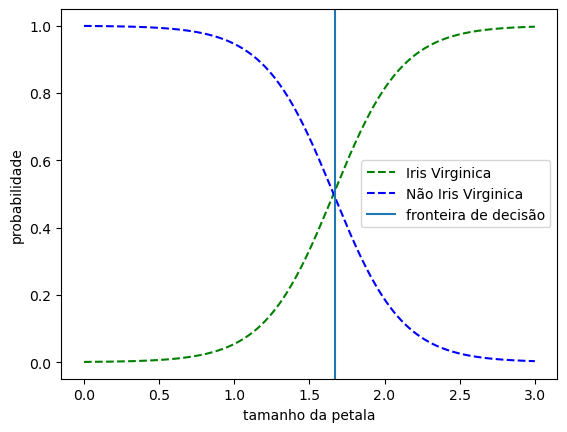

In [76]:
plt.plot(X_novo,y_prob[:,1], 'g--', label= 'Iris Virginica')
plt.plot(X_novo,y_prob[:,0], 'b--', label= 'Não Iris Virginica')
plt.axvline(x= 1.67, label = 'fronteira de decisão')
plt.xlabel('tamanho da petala')
plt.ylabel('probabilidade')
plt.legend()


In [ ]:
"""
Fronteira de decisão por volta de 1,6 cm, no qual há mais ou menos 50% de chance de ser qualquer um dos dois

"""

## Agora usando a softmax, para classificarmos mais de uma classe

In [79]:
X_2 = iris['data'][:,[2,3]] # comprimento e largura da petala
y_2 = iris['target']

In [81]:
"""
Por padrão, ao se deparar com mais de uma classe a LogisticRegression do sklearn utiliza-se do One versus the rest (treina um modelo de 
classificação binária para cada classe), porém podemos mudar isso com o hiperparametro multi_class para utilizarmos a softmax

Ele também aplica regularização l2 por padrão, que tambem podemos mudar com o hiperparametro C:
"""
reg_softmax = LogisticRegression(multi_class='multinomial', solver='lbfgs',C=10)
reg_softmax.fit(X_2,y_2)

LogisticRegression(C=10, multi_class='multinomial')

In [83]:
reg_softmax.predict([[5,2]])

array([2])

In [85]:
reg_softmax.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])